# Calculate Cosine Similarity Score (KSA, JD_usajobs)

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

/Users/jun/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

JD = pd.read_csv('/Users/jun/Desktop/DAEN690-008/Code/JD_usajobs.csv')


KSA = pd.read_excel('/Users/jun/Desktop/DAEN690-008/Code/KSA.xlsx')

In [3]:
JD

,Title,Location,Organization,Department,QualificationSummary
0,Director (Cyber Policy and Programs),"Washington, District of Columbia",Office of the National Cyber Director,Executive Office of the President,In order to qualify for the Director (Cyber Po...
1,CYBER OPERATIONS PLANS ANALYST,"Fort Meade, Maryland",AFELEM US CYBER COMMAND,Department of the Air Force,"In order to qualify, you must meet the special..."
2,SUPERVISORY CYBER POLICY-PLANS AND PROGRAMS,"Fort Meade, Maryland",AFELEM US CYBER COMMAND,Department of the Air Force,This is a GG-14 position in the Cyber Excepted...
3,Information Technology (Cybersecurity),Anywhere in the U.S. (remote job),Department of Energy - Agency Wide,Department of Energy,You must meet the Basic Requirement and the Sp...
4,PROGRAM ANALYST,"Fort Meade, Maryland",AFELEM US CYBER COMMAND,Department of the Air Force,"In order to qualify, you must meet the special..."
...,...,...,...,...,...
478,Supervisory Biomedical Engineer (Clinical),Multiple Locations,Veterans Health Administration,Department of Veterans Affairs,Applicants pending the completion of education...
479,Diagnostic Radiologic Technologist - Intervent...,"Bay Pines, Florida",Veterans Health Administration,Department of Veterans Affairs,Applicants pending the completion of education...
480,Supervisory IT Specialist (Deputy Director),"Washington, District of Columbia",Commodity Futures Trading Commission,Other Agencies and Independent Organizations,"To qualify for the CT-16, you must possess at ..."
481,Biomedical Equipment Specialist (BESS),"Cincinnati, Ohio",Veterans Health Administration,Department of Veterans Affairs,Applicants pending the completion of education...


In [4]:
KSA

,OPM_Code,NICE_Specialty_Area,NICE_Specialty_Area_Description,Work_Role,Work_Role_Description,KSA_ID,KSA_Description
0,511,Cybersecurity Defense Analysis (CDA),Uses defensive measures and information collec...,Cyber Defense Analyst,Uses data collected from a variety of cyber de...,A0010,Ability to analyze malware.
1,461,Systems Analysis (ANA),Studies an organization's current computer sys...,Systems Security Analyst,Responsible for the analysis and development o...,A0015,Ability to conduct vulnerability scans and rec...
2,511,Cybersecurity Defense Analysis (CDA),Uses defensive measures and information collec...,Cyber Defense Analyst,Uses data collected from a variety of cyber de...,A0066,Ability to accurately and completely source al...
3,531,Incident Response (CIR),Responds to crises or urgent situations within...,Cyber Defense Incident Responder,"Investigates, analyzes, and responds to cyber ...",A0121,Ability to design incident response for cloud ...
4,461,Systems Analysis (ANA),Studies an organization's current computer sys...,Systems Security Analyst,Responsible for the analysis and development o...,A0123,Ability to apply cybersecurity and privacy pri...
...,...,...,...,...,...,...,...
124,511,Cybersecurity Defense Analysis (CDA),Uses defensive measures and information collec...,Cyber Defense Analyst,Uses data collected from a variety of cyber de...,S0169,Skill in conducting trend analysis.
125,531,Incident Response (CIR),Responds to crises or urgent situations within...,Cyber Defense Incident Responder,"Investigates, analyzes, and responds to cyber ...",S0173,Skill in using security event correlation tools.
126,531,Incident Response (CIR),Responds to crises or urgent situations within...,Cyber Defense Incident Responder,"Investigates, analyzes, and responds to cyber ...",S0365,Skill to design incident response for cloud se...
127,461,Systems Analysis (ANA),Studies an organization's current computer sys...,Systems Security Analyst,Responsible for the analysis and development o...,S0367,Skill to apply cybersecurity and privacy princ...


In [5]:

def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Stem the words
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text



JD['QualificationSummary'] = JD['QualificationSummary'].apply(preprocess_text)
KSA['KSA_Description'] = KSA['KSA_Description'].apply(preprocess_text)

In [6]:
JD['QualificationSummary']

0      order qualifi director cyber polici program po...
1      order qualifi must meet special experi requir ...
2      gg14 posit cyber except servic ce gg14 duti pr...
3      must meet basic requir special experi qualifi ...
4      order qualifi must meet special experi requir ...
                             ...                        
478    applic pend complet educ certificationlicensur...
479    applic pend complet educ certificationlicensur...
480    qualifi ct16 must posse least one year special...
481    applic pend complet educ certificationlicensur...
482    applic pend complet educ certificationlicensur...
Name: QualificationSummary, Length: 483, dtype: object

In [7]:
KSA['KSA_Description']

0                                     abil analyz malwar
1      abil conduct vulner scan recogn vulner secur s...
2      abil accur complet sourc data use intellig ass...
3           abil design incid respons cloud servic model
4      abil appli cybersecur privaci principl organiz...
                             ...                        
124                          skill conduct trend analysi
125                    skill use secur event correl tool
126        skill design incid respons cloud servic model
127    skill appli cybersecur privaci principl organi...
128    skill use cyber defens servic provid report st...
Name: KSA_Description, Length: 129, dtype: object

In [8]:

KSA_string = ' '.join(KSA['KSA_Description'])


KSA_df = pd.DataFrame({'KSA': KSA_string}, index=[0])


KSA_df

,KSA
0,abil analyz malwar abil conduct vulner scan re...


In [9]:

concatenated_text = pd.concat([JD['QualificationSummary'], KSA_df['KSA']], ignore_index=True)


concatenated_text

0      order qualifi director cyber polici program po...
1      order qualifi must meet special experi requir ...
2      gg14 posit cyber except servic ce gg14 duti pr...
3      must meet basic requir special experi qualifi ...
4      order qualifi must meet special experi requir ...
                             ...                        
479    applic pend complet educ certificationlicensur...
480    qualifi ct16 must posse least one year special...
481    applic pend complet educ certificationlicensur...
482    applic pend complet educ certificationlicensur...
483    abil analyz malwar abil conduct vulner scan re...
Length: 484, dtype: object

## Approach 1. use CountVectorizer

In [10]:

ctvectorizer = CountVectorizer()


ct_matrix = ctvectorizer.fit_transform(concatenated_text)


ct_matrix

<484x4324 sparse matrix of type '<class 'numpy.int64'>'
	with 89976 stored elements in Compressed Sparse Row format>

In [11]:

cosine_ct = cosine_similarity(ct_matrix[:-1], ct_matrix[-1])



JD['cos_KSA_countvect'] = cosine_ct[:,0]

In [12]:

JD['cos_KSA_countvect']

0      0.168658
1      0.293782
2      0.327143
3      0.216142
4      0.431521
         ...   
478    0.138370
479    0.240314
480    0.275917
481    0.174275
482    0.174275
Name: cos_KSA_countvect, Length: 483, dtype: float64

In [13]:

print(JD['cos_KSA_countvect'].describe())

count    483.000000
mean       0.194588
std        0.093825
min        0.000000
25%        0.135626
50%        0.176513
75%        0.247106
max        0.514193
Name: cos_KSA_countvect, dtype: float64


## Approach 2. use TF-IDF vectorizer

In [14]:

tfvectorizer = TfidfVectorizer()


tfidf_matrix = tfvectorizer.fit_transform(concatenated_text)


cosine_tfidf = cosine_similarity(tfidf_matrix[:-1], tfidf_matrix[-1])



JD['cos_KSA_tfidf'] = cosine_tfidf[:,0]

In [15]:

JD['cos_KSA_tfidf']

0      0.158812
1      0.163726
2      0.184526
3      0.182290
4      0.224502
         ...   
478    0.081019
479    0.100969
480    0.176791
481    0.103135
482    0.103135
Name: cos_KSA_tfidf, Length: 483, dtype: float64

In [16]:

print(JD['cos_KSA_tfidf'].describe())

count    483.000000
mean       0.124640
std        0.062288
min        0.000000
25%        0.082503
50%        0.112698
75%        0.164261
max        0.360637
Name: cos_KSA_tfidf, dtype: float64


In [17]:
pip install wordcloud


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


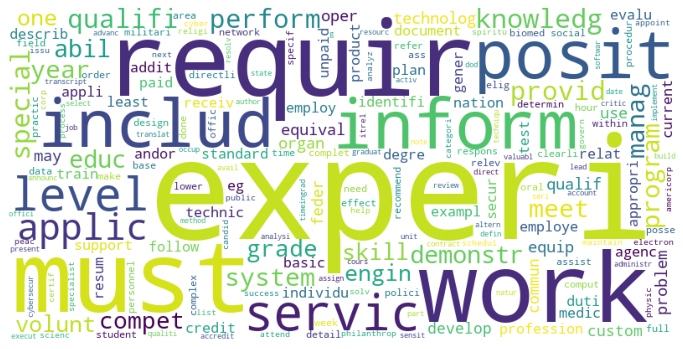

In [18]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# concatenate all the JDusajobs
JD_usajobs = ' '.join(concatenated_text[:482])

# Load stop words
stop_words = set(stopwords.words('english'))

# tokenize and remove stop words
usa_tokens = [word for word in word_tokenize(JD_usajobs.lower()) if word.isalpha() and word not in stopwords.words('english')]

# get the frequency distribution
fdist = FreqDist(usa_tokens)

# generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)

# plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# Word Cloud for Job Descriptions from USAJobs

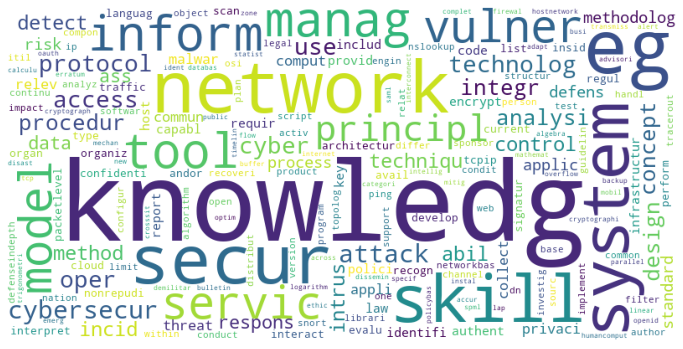

In [19]:
# process the aggregated KSA
ksa = concatenated_text[483]

# tokenize and remove stop words
ksa_tokens = [word for word in word_tokenize(ksa.lower()) if word.isalpha() and word not in stopwords.words('english')]

# get the frequency distribution
fdist = FreqDist(ksa_tokens)

# generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)

# plot the word cloud
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


# Word Cloud for aggregated 129 KSA